# Chapter 4. 카운트 기반의 문서표현
* BOW(Bag of Words)
    * 단어별 카운트를 기반으로 문서로부터 특성을 추출하고 표현하는 방식 
    * 문서에서 단어의 사용 여부만 표시하는 방법 
    * 단어 수를 세어 표시하는 방법 
    * 단어가 문서에 나타난 수를 반영해 보정하는 방법 

## 01 카운트 기반 문서 표현의 개념 
* 문서의 의미를 반영해 벡터를 만드는 과정
* 문서에 나타난 단어의 통계를 이용해 문서의 내용을 이해하고자 하는 시도 
* 단어의 빈도 파악, 어떤 단어가 주로 사용됐는지를 파악하여 내용을 유추함 

* 텍스트 마이닝 
    * 대상 텍스트를 우리가 다룰 수 있는 수치 형태로 변환해야 함 
    * 이때, 각 수치는 그 텍스트의 특성(feature)를 표현함 
    * 텍스트의 특성을 정의하고 그 값을 텍스트로 구분함 

* 텍스트의 특성 
    * 텍스트의 특성 : 단어 
    * 특성이 갖는 값 : 단어가 텍스트에서 나타난 횟수 

* 문제점 1 : 각 문서별 다른 특성 
    * 모든 문서의 특성이 서로 같아야 비교가 가능 (문서의 특성 제각각)
    * 비교 가능하도록 동일한 문서 특성을 갖게 하기 위해 : 동일한 단어들로 특성 표현 
    * 말뭉치에 대해 단어 집합(vocabulary) 구성
    * 단어 집합을 대상으로 각 문서에 대해 빈도를 표시 
        * 말뭉치(corpus) : 언어연구를 위해 텍스트를 가공,처리,분석할 수 있는 자료의 집합 

* 문제점 2: 희소 벡터(sparse vector)
    * 사용하지 않은 단어들이 훨씬 많이 포함됨 
    * 문서를 표현하기 위해 너무 많은 특성을 사용, 그 특성 중 극히 일부만 값을 갖음 
    * 대부분 값이 0인 특성 벡터: 희소 벡터(sparse vector)
    * 저장 공간, 연산 측면에서 비효율적 

* 1. 텍스트는 우리가 정의한 특성에 대한 특성 값의 집합(벡터) 로 변환함 
* 2. 단어: 특성/ 단어의 빈도 : 특성값 -> 이러한 방식 BOW(BAG of Words) -> 순서가 사라짐 

## 02 BOW 기반의 카운트 벡터 생성

In [13]:
#----------------------------------------
# bow 실습, nltk에서 제공하는 영화 리뷰 사용 
# movie_reviews = 2,000여개 영화 리뷰, 그 리뷰의 내용에 대한 감성 label(긍정, 부정)
# https://www.nltk.org/api/nltk.sentiment.util.html?highlight=movie_reviews#nltk.sentiment.util.demo_movie_reviews

# fileids()
    # 영화 리뷰 문서들의 id(fileid)를 반환 
    # 매개변수 categories 를 이용하면 특정 분류에 속하는 문서들의 id 만 가져올 수 있음 

# categories()
    # 리뷰 문서들에 대한 분류, 라벨값 
    # 감성을 표현하는 긍정('pos') & 부정('neg')

# raw()
    # 리뷰 문서의 원문을 문자열의 리스트 형태로 봔한 
    # 인수로 fileids 를 주면 특정 문서만 가져올 수 있음 

# sents()
    # 리뷰 문서의 원문에 대해 nltk 의 sent_tokenize 로 토큰화한 문장들을 
    # 다시 word_tokenize로 토큰화한 결과를 반환 
    # 인수로 fileid를 주면 특정 문서에 대한 토큰화 결과를 가져옴 

# words()
    # 리뷰 문서의 원문에 대한 NLTK의 word_tokenize로 토큰화한 결과를 반환 
    # 인수로 fileid 를 주며 특정 문서에 대한 토큰화 결과를 가져옴 
#----------------------------------------
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.corpus import movie_reviews

print('#review count:', len(movie_reviews.fileids())) #영화 리뷰 문서의 id를 반환
print('#samples of file ids:', movie_reviews.fileids()[:10]) #id를 10개까지만 출력
print('#categories of reviews:', movie_reviews.categories()) # label, 즉 긍정인지 부정인지에 대한 분류
print('#num of "neg" reviews:', len(movie_reviews.fileids(categories='neg'))) #label이 부정인 문서들의 id를 반환
print('#num of "pos" reviews:', len(movie_reviews.fileids(categories='pos'))) #label이 긍정인 문서들의 id를 반환
fileid = movie_reviews.fileids()[0] #첫번째 문서의 id를 반환
print('#id of the first review:', fileid)
print('#first review content:\n', movie_reviews.raw(fileid)[:200]) #첫번째 문서의 내용을 200자까지만 출력
print()
print('#sentence tokenization result:', movie_reviews.sents(fileid)[:2]) #첫번째 문서를 sentence tokenize한 결과 중 앞 두 문장
print('#word tokenization result:', movie_reviews.words(fileid)[:20]) #첫번째 문서를 word tokenize한 결과 중 앞 스무 단어


# 총 2,000개의 리뷰 문서
# fileid는 문자열로 되어 있고, 감성과 파일명이 포함됨 - ex. 'neg/cv000_29416.txt'
# movie_reviews.sents() - 문서를 문장 단위로 토큰화, 문장을 단어 단위로 토큰화 - 리스트의 리스트 
# movie_reviews.words() - 원문 전체에 대해 바로 단어 단위로 토큰화, 결과가 하나의 리스트 

#review count: 2000
#samples of file ids: ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
#categories of reviews: ['neg', 'pos']
#num of "neg" reviews: 1000
#num of "pos" reviews: 1000
#id of the first review: neg/cv000_29416.txt
#first review content:
 plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
w

#sentence tokenization result: [['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.']]
#word tokenization result: ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', '

In [15]:
#----------------------------------------
# BOW - 텍스트를 특성 벡터로 변환 , 특성 값 : 빈도수 
#----------------------------------------
# 문서 집합으로부터 특성 벡터를 추출하는 과정 

# 1. 텍스트 전처리 -> 의미가 있는 최소 단위의 리스트로 변환 
    # 토큰화, 정규화, 품사 태깅 등의 방법 사용 
    # ex. movie_reviews.words() 가 제공하는 결과 사용 

# 2. 특성 추출 대상이 되는 단어 집합을 구성 
    # 특성 집합 : 어휘 집합 
    # 말뭉치에 있는 모든 단어를 사용하기 보단 자신이 정한 기준에 따라 단어 선별 
    # ex. 단어에 대한 빈도를 계산하고, 빈도가 높은 상위 단어 n개만 사용 

# 3. 각 문서별로 특성 추출 대상 단어들에 대해 단어의 빈도를 계산- > 특성 벡터 추출 
    # 단어의 빈도를 특성 값으로 사용 : 카운트 벡터 

In [16]:
# 1. 각 문서에 대한 토큰화 결과들로 리스트를 만듦 
# fileids() 를 이용해 몯느 문서의 id를 가져오고
# 각 id 들에 대한 words()로 토큰화 결과를 가져와 리스트를 만듦

documents = [list(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
print(documents[0][:50]) # 첫째 문서의 앞 50 개 단어 출력 

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch']


In [17]:
# 딕셔너리로 단어별 말뭉치 전체에서의 빈도를 계산 
# 빈도가 높은 단어부터 정렬하여 빈도수 상위 20 개 단어를 출력 

word_count = {}
for text in documents:
    for word in text:
        word_count[word] = word_count.get(word, 0) + 1

sorted_features = sorted(word_count, key=word_count.get, reverse=True)
for word in sorted_features[:10]:
    print(f"count of '{word}': {word_count[word]}", end=', ')

count of ',': 77717, count of 'the': 76529, count of '.': 65876, count of 'a': 38106, count of 'and': 35576, count of 'of': 34123, count of 'to': 31937, count of ''': 30585, count of 'is': 25195, count of 'in': 21822, 

In [18]:
# ' '.'the','a' 와 같이 의미적으로 쓸모 없는 단어의 빈도가 높음 
# 정규표현식 통해 다시 토큰화 
# raw() 를 이용해 원문을 가져와 documents 를 만들고 
# 이에 대해 토큰화 
# NLTK 가 제공하는 불용어 사전을 이용해 불용어를 제거 

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords #일반적으로 분석대상이 아닌 단어들

tokenizer = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴

#words() 대신 raw()를 이용해 원문을 가져옴
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()] 
# print('documents', documents[0])

# stopwords의 적용과 토큰화를 동시에 수행.
tokens = [[token for token in tokenizer.tokenize(doc) if token not in english_stops] for doc in documents]
# print('documents', tokens[0:4])

word_count = {}
for text in tokens:
    for word in text:
        word_count[word] = word_count.get(word, 0) + 1

sorted_features = sorted(word_count, key=word_count.get, reverse=True)

print('num of features:', len(sorted_features))
for word in sorted_features[:10]:
    print(f"count of '{word}': {word_count[word]}", end=', ')

num of features: 43030
count of 'film': 8935, count of 'one': 5791, count of 'movie': 5538, count of 'like': 3690, count of 'even': 2564, count of 'time': 2409, count of 'good': 2407, count of 'story': 2136, count of 'would': 2084, count of 'much': 2049, 

In [19]:
# 단어로 구성된 특성 집합 
# 상위 빈도수를 가지는 단어 천 개만 추출해서 최종적으로 문서를 표현할 특성으로 사용하기로 함 
# 빈도가 높은 상위 1000개의 단어만 추출하여 features를 구성
word_features = sorted_features[:1000] 
print(word_features[0:10], end= ',')

['film', 'one', 'movie', 'like', 'even', 'time', 'good', 'story', 'would', 'much'],

In [20]:
# 주어진 문서를 특성 벡터, 즉, 카운트 벡터로 변환하는 함수 
# 특성 집합(word_feature) : 단어들의 빈도에 따라 순서가 정해져 있음 
# 카운트 벡터: word_feature 단어의 순서에 따라 단어의 빈도 기록 
    # 특성 집합 예제 (word_features_ex) : ['one','two','teen','couples','solo']
    # 주어진 문서의 토큰화 결과: ['two','two','couples']
    # 변한된 카운트 벡터 결과: [0,2,0,1,0]


def document_features(document, word_features):
    word_count = {}
    for word in document: #document에 있는 단어들에 대해 빈도수를 먼저 계산
        word_count[word] = word_count.get(word, 0) + 1
        
    features = []
    for word in word_features: #word_features의 단어에 대해 계산된 빈도수를 feature에 추가
        features.append(word_count.get(word, 0)) #빈도가 없는 단어는 0을 입력
    return features

word_features_ex = ['one', 'two', 'teen', 'couples', 'solo']
doc_ex = ['two', 'two', 'couples']
print(document_features(doc_ex, word_features_ex))


[0, 2, 0, 1, 0]


In [21]:
# 전체 리뷰 집합에 대해 적용
# word_features 의 단어는 빈도가 높은 순서대로 정렬 
feature_sets = [document_features(d, word_features) for d in tokens]

# 첫째 feature set의 내용을 앞 20개만 word_features의 단어와 함께 출력
for i in range(20):
    print(f'({word_features[i]}, {feature_sets[0][i]})', end=', ')

(film, 5), (one, 3), (movie, 6), (like, 3), (even, 3), (time, 0), (good, 2), (story, 0), (would, 1), (much, 0), (also, 1), (get, 3), (character, 1), (two, 2), (well, 1), (first, 0), (characters, 1), (see, 2), (way, 3), (make, 5), 

In [22]:
# 뒤로 갈수록 카운트 값이 0이 아닌 단어가 많이 포함 
# 마지막 20개 값을 출력 
print(feature_sets[0][-20:]) 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 4.3 사이킷런을 이용한 카운트 벡터 생성

### CountVectorizer
* scikit-learn (sklearn)
* sklearn.feature_extraction 모듈 
* CountVectorizer 클래스 
http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction  
---
* 매개변수 
    * tokenizer
        * 함수 형태로 외부 토크나이저 저장
        * 지정하지 않으면 자체 토크나이저를 사용 
    * stop_words 
        * 리스트 형태로 불용어 사전을 지정 
        * 'english' 로 값을 주면 자체 영어 불용어 사전을 사용 
    * ngram_range
        * (min_n, max_n) 의 튜플 형태로 ngram 범위 지정 
        * 기본값 (1,1)
    * max_df 
        * 단어로 특성 구성할 때, 
        * 문서에 나타난 빈도(document frequency)가 max_df 보다 크면 제외함 
        * 비율/ 문서의 수로 지정 가능 
    * min_df 
        * 단어로 특성을 구성할 때, 
        * 문서에 나타난 빈도(document frequency)가 min_df 보다 작으면 제외함 
        * 비율/ 문서의 수로 지정 가능 
    * max_features
        * 최대 특성의 수 지정 
        * 지정하지 않으면 전체 단어를 사용함 
    * vocabulary   
        * 특성으로 사용할 단어들을 직접 지정함 
    * binary 
        * True 값을 주면 빈도 대신 1절에서 배운 단어의 유무(1/0) 로 특성 값을 생성 

---  
* 메서드 
    * fit(raw_documents) 
        * tokenizer, stop_words, max_df, min_df, max_features 등을 이용해
         문서 집합 전체에 대해 토큰화, 불용어 제거, 특성 선택 수행하여 특성 집합을 생성 
        * 인수로 주어진 문서 집합(raw_documents)에 대한 토큰화 수행 
        * 특성 집합 생성 (단어, 인덱스)
            * (0,0): 5 : ((0: 첫 문자, 0 : 특성 집합의 인덱스, 5: 이 특성의 빈도)
            * 즉, 첫 문서에서 'film' 은 5회 나타남 
    * transform(raw_documents)
        * fit() 에서 생성한 특성 집합 이용해 
          인수로 주어진 문서 집합 (raw_documents)에 대한 카운트벡터로 변환해 반환 
    * fit_transform(raw_documents)
        * 인수로 주어진 문서 집합(raw_documents)에 대해 fit, transform 동시에 수행 
    * get_feature_names_out()
        * 특성 집합에 있는 특성의 이름 
        * 즉, 단어를 순서대로 반환 
        * sklearn 1.0 으로 바뀌기 전에 get_feature_names() 
        * sklearn 의 버젼 확인하고 사용 

In [23]:
# data 준비, movie_reviews.raw()를 사용하여 raw text를 추출
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
# print(movie_reviews.fileids()[0:3]) # 'neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt'
# print(movie_reviews.raw('neg/cv000_29416.txt')) # raw_documents, 리뷰 원문 

In [24]:
# vocabulary 매개변수 : 앞에서 만든 word_features 에 있는 단어들만으로 벡터 구성 
# 바로 분석을 시작할 때 max_features 에 빈도 높은 단어부터 사용할 단어 지정할 수 있음 
# CounterVectorizer 객체 생성 

print('word_features(0~4): ',word_features[0:5])

from sklearn.feature_extraction.text import CountVectorizer

#cv = CountVectorizer() #모든 매개변수에 디폴트 값을 사용하는 경우

#앞에서 생성한 word_features를 이용하여 특성 집합을 지정하는 경우
cv = CountVectorizer(vocabulary=word_features) 

#cv = CountVectorizer(max_features=1000) #특성 집합을 지정하지 않고 최대 특성의 수를 지정하는 경우
print(cv) #객체에 사용된 인수들을 확인

word_features(0~4):  ['film', 'one', 'movie', 'like', 'even']
CountVectorizer(vocabulary=['film', 'one', 'movie', 'like', 'even', 'time',
                            'good', 'story', 'would', 'much', 'also', 'get',
                            'character', 'two', 'well', 'first', 'characters',
                            'see', 'way', 'make', 'life', 'really', 'films',
                            'plot', 'little', 'people', 'could', 'bad', 'scene',
                            'never', ...])


In [25]:
# fit_transform() 으로 특성 집합 생성, 카운트 벡터 생성 
# get_feature_names_out() : word_features와 사용된 단어 및 순서 동일 

reviews_cv = cv.fit_transform(reviews) #reviews를 이용하여 count vector를 학습하고, 변환
print(cv.get_feature_names_out()[:20]) # count vector에 사용된 feature 이름을 반환
print(word_features[:20]) # 비교를 위해 출력

['film' 'one' 'movie' 'like' 'even' 'time' 'good' 'story' 'would' 'much'
 'also' 'get' 'character' 'two' 'well' 'first' 'characters' 'see' 'way'
 'make']
['film', 'one', 'movie', 'like', 'even', 'time', 'good', 'story', 'would', 'much', 'also', 'get', 'character', 'two', 'well', 'first', 'characters', 'see', 'way', 'make']


In [26]:
# reviews_cv(리뷰 문서에 대한 카운트 벡터)
# 타입: scipy.sparse.csr.csr_matrix 
# shape (2000,1000) : 리뷰의 수 2000개, 각 리뷰마다 특성의 수가 1,000개 

print('#type of count vectors:', type(reviews_cv))
print('#shape of count vectors:', reviews_cv.shape)
print('#sample of count vector:')
print(reviews_cv[0, :10])

# (0,0), (0,1) : 좌표 , 오른쪽 숫자: 빈도수 
# 빈도가 있는 것만 저장 (0 제외)

#type of count vectors: <class 'scipy.sparse.csr.csr_matrix'>
#shape of count vectors: (2000, 1000)
#sample of count vector:
  (0, 0)	6
  (0, 1)	3
  (0, 2)	6
  (0, 3)	3
  (0, 4)	3
  (0, 6)	2
  (0, 8)	1


In [27]:
# 2000 * 1000 크기
# 실제 인자 252,984 , 나머지 값은 0 
# 252,984 /(2,000*1,000), 즉 12.65% 만 인자 있음 , 희소 행렬 
# Compressed Sparse Row format 데이터 타입 사용 
reviews_cv

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 252984 stored elements in Compressed Sparse Row format>

In [28]:
print(feature_sets[0][:20]) #절 앞에서 직접 계산한 카운트 벡터
print(reviews_cv.toarray()[0, :20]) #변환된 결과의 첫째 feature set 중에서 앞 20개를 출력

[5, 3, 6, 3, 3, 0, 2, 0, 1, 0, 1, 3, 1, 2, 1, 0, 1, 2, 3, 5]
[6 3 6 3 3 0 2 0 1 0 1 3 2 2 1 0 1 2 3 5]


In [29]:
# get_feature_names_out () : 반환하는 특성
# 단어들의 순서: review_cv 에 있는 특성 값들의 순서 일치 
for word, count in zip(cv.get_feature_names_out()[:20], reviews_cv[0].toarray()[0, :5]):
    print(f'{word}:{count}')

film:6
one:3
movie:6
like:3
even:3


In [30]:
# DTM & TDM
    # DTM (Document Term Matrix) 
        # 문서를 행, 단어를 열로 해서 단어의 빈도를 나타낸 행렬 
        # CountVectorizer 로 생성한 reviews_cv 행렬 
        # reviews_cv (2000,1000): 리뷰 수 , 특성의 수 
    
    # TDM(Term Document Matrix)
        # DTM 의 전치 행렬 
        # 행과 열을 바꾼 것, 대각선을 축으로 반사시킨 결과  

## 4.4 한국어 텍스트의 카운트 벡터 변환
* CountVectorizer 가 제공하는 기본 토크나이저를 쓸 수 없음 
* KoNLPy의 형태소 분석기를 지정, CountVectorizer 객체를 선언 

* 한국어 공개 데이터 
    * 네이버 영화 리뷰, 텍스트 파일로 제공 
        * 감성 분석 
    * 네이버 뉴스 분류, NNST 파이썬 라이브러리 형태로 제공 
        * 정치, 경제 등 장르 분류 
    * 네이버 뉴스 분류, 데이터 파일로 제공  
    

* 예제 다음(Daum) 영화 리뷰 크롤링해 만든 데이터 
    * 리뷰 내용, 평점, 날짜, 영화 제목으로 이루어짐 
    * 평점, 영화 제목- 감성 분석 , 영화 제목 예측, 분류 가능 
    * 날짜를 통한 토픽 트렌드 가능 

In [31]:
import pandas as pd
df = pd.read_csv('review.csv')
df.head(10)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워
5,나는 재밌게 봄,10,2018.10.14,인피니티 워
6,0.5점은 줄 수 없냐?,0,2018.10.10,인피니티 워
7,헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...,10,2018.10.08,인피니티 워
8,충격 결말,9,2018.10.06,인피니티 워
9,응집력,8,2018.10.05,인피니티 워


In [32]:
# review 항목으로 카운트 벡터 생성 

from sklearn.feature_extraction.text import CountVectorizer
daum_cv = CountVectorizer(max_features=1000)

daum_DTM = daum_cv.fit_transform(df.review) #review를 이용하여 count vector를 학습하고, 변환
print(daum_cv.get_feature_names_out()[:100]) # count vector에 사용된 feature 이름을 반환]

# cg 가 들어간 단어들(cg, cg가, cg는, cg도, cg 만)- 별도의 단어로 분류됨 
# 감동이 들어간 단어들(감동, 감동과, 감동도, 감동은)
# 이런 단어들은 의미적으로 같은 단어로 취급해야 함  

['10점' '18' '1987' '1도' '1점' '1점도' '2시간' '2시간이' '2편' '5점' '6점' '7점' '8점'
 'cg' 'cg가' 'cg는' 'cg도' 'cg만' 'good' 'of' 'ㅋㅋ' 'ㅋㅋㅋ' 'ㅋㅋㅋㅋ' 'ㅎㅎ' 'ㅎㅎㅎ'
 'ㅜㅜ' 'ㅠㅠ' 'ㅠㅠㅠ' 'ㅡㅡ' '가는' '가는줄' '가면' '가서' '가슴' '가슴아픈' '가슴이' '가장' '가족'
 '가족과' '가족들과' '가족의' '가족이' '가지고' '간만에' '갈수록' '감독' '감독님' '감독은' '감독의' '감독이'
 '감동' '감동과' '감동도' '감동은' '감동을' '감동이' '감동입니다' '감동적' '감동적이고' '감동적인' '감사드립니다'
 '감사합니다' '감정이' '갑자기' '갔는데' '갔다가' '강철비' '강추' '강추합니다' '같고' '같네요' '같다' '같습니다'
 '같아' '같아요' '같은' '같은데' '같음' '같이' '개연성' '개연성이' '개인적으로' '거의' '겁나' '것도' '것은'
 '것을' '것이' '것이다' '겨울왕국' '결국' '결말' '결말이' '계속' '고맙습니다' '곤지암' '공포' '공포를'
 '공포영화' '관객']


In [33]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

print('#전체 형태소 결과:', twitter_tag.morphs(df.review[1]))
print('#명사만 추출:', twitter_tag.nouns(df.review[1]))
print('#품사 태깅 결과', twitter_tag.pos(df.review[1]))
# 품사 태깅 결과로 Josa, Punctuation 을 제외함 
# 명사, 동사, 형용사만 선택

#전체 형태소 결과: ['몰입', '할수밖에', '없다', '.', '어렵게', '생각', '할', '필요없다', '.', '내', '가', '전투', '에', '참여', '한', '듯', '손', '에', '땀', '이남', '.']
#명사만 추출: ['몰입', '생각', '내', '전투', '참여', '듯', '손', '땀', '이남']
#품사 태깅 결과 [('몰입', 'Noun'), ('할수밖에', 'Verb'), ('없다', 'Adjective'), ('.', 'Punctuation'), ('어렵게', 'Adjective'), ('생각', 'Noun'), ('할', 'Verb'), ('필요없다', 'Adjective'), ('.', 'Punctuation'), ('내', 'Noun'), ('가', 'Josa'), ('전투', 'Noun'), ('에', 'Josa'), ('참여', 'Noun'), ('한', 'Determiner'), ('듯', 'Noun'), ('손', 'Noun'), ('에', 'Josa'), ('땀', 'Noun'), ('이남', 'Noun'), ('.', 'Punctuation')]


In [34]:
def my_tokenizer(doc):
    return [token for token, pos in twitter_tag.pos(doc) if pos in ['Noun', 'Verb', 'Adjective']]

print("나만의 토크나이저 결과:", my_tokenizer(df.review[1]))

나만의 토크나이저 결과: ['몰입', '할수밖에', '없다', '어렵게', '생각', '할', '필요없다', '내', '전투', '참여', '듯', '손', '땀', '이남']


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

#토크나이저와 특성의 최대개수를 지정
daum_cv = CountVectorizer(max_features=1000, tokenizer=my_tokenizer)
#명사만 추출하고 싶은 경우에는 tokenizer에 'twitter_tag.nouns'를 바로 지정해도 됨

daum_DTM = daum_cv.fit_transform(df.review) #review를 이용하여 count vector를 학습하고, 변환
print(daum_cv.get_feature_names_out()[:100]) # count vector에 사용된 feature 이름을 반환

['가' '가는' '가는줄' '가면' '가서' '가슴' '가장' '가족' '가족영화' '가지' '가치' '각색' '간' '간다'
 '간만' '갈' '갈수록' '감' '감독' '감동' '감사' '감사합니다' '감상' '감성' '감정' '감탄' '갑자기' '갔는데'
 '갔다' '갔다가' '강' '강철' '강추' '같고' '같네요' '같다' '같습니다' '같아' '같아요' '같은' '같은데'
 '같음' '개' '개그' '개봉' '개연' '개인' '거' '거기' '거리' '거의' '걱정' '건' '건가' '건지' '걸'
 '겁니다' '것' '게' '겨울왕국' '결론' '결말' '경찰' '경험' '계속' '고' '고맙습니다' '고민' '고생' '곤지암'
 '곳' '공감' '공포' '공포영화' '과' '과거' '관' '관객' '관객수' '관람' '광주' '괜찮은' '교훈' '구성'
 '국내' '국민' '군인' '군함도' '굿' '권선' '귀신' '그' '그것' '그게' '그날' '그냥' '그닥' '그대로'
 '그때' '그래픽']


In [36]:
print(repr(daum_DTM))
print(110800/(14725*1000)) # 희소 행렬, 값이 있는 비율 0.75% 

<14725x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 110800 stored elements in Compressed Sparse Row format>
0.007524617996604414


In [39]:
# 둘째 리뷰에 대해 사용된 단어와 개수 출력 
# max_feature: 1,000으로 제한해 빈도가 낮은 단어들 제외 
for word, count in zip(daum_cv.get_feature_names_out(), daum_DTM[1].toarray()[0]):
    if count > 0:
        print(word, ':', count, end=', ')

내 : 1, 듯 : 1, 몰입 : 1, 생각 : 1, 손 : 1, 없다 : 1, 할 : 1, 

## 4.5 카운트 벡터의 활용
* 카운트 벡터, 문서의 특성 표현 
* 문서 유사도를 측정하는데에도 사용됨 
* 유사도 측정: 주어진 문서와 가장 유사한 문서를 말뭉치에서 검색 

### 코사인 유사도(Cosine similarity)
* 두 벡터가 이루는 각도의 코사인 값 
* 벡터의 크기는 중요하지 않고, 벡터의 방향성만 비교 
* 두 벡터가 가장 가까우면(각도 일치): 유사도 1 
* 가장 먼 경우 (각도가 가장 크면): 유사도 0 

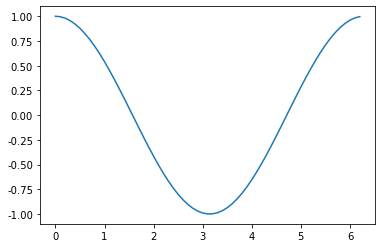

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
x = np.arange(0,2*np.pi,0.1)   # start,stop,step 
y = np.cos(x)
#print(x)
plt.plot(x, y)
plt.show()

In [41]:
#------------------------------------------------------------------
# cosine_similarity 
    # 다수 벡터, 다수 벡터간의 유사도 한번에 계산 (벡터 하나씩 유사도 계산 X)
    # 결과로 행렬을 반환 
    # m개 벡터, n개 벡터간의 유사도 한꺼번 계산 (m,n)의 2차원 행렬 

# 아래 예시: 대상 문서 하나, 이를 전체 리뷰와 비교 (1,2000) 행렬로 반환
#------------------------------------------------------------------

from sklearn.metrics.pairwise import cosine_similarity

start = len(reviews[0]) // 2 #첫째 리뷰의 문자수를 확인하고 뒤 절반을 가져오기 위해 중심점을 찾음
source = reviews[0][-start:] #중심점으로부터 뒤 절반을 가져와서 비교할 문서를 생성

source_cv = cv.transform([source]) #코사인 유사도는 카운트 벡터에 대해 계산하므로 벡터로 변환
#transform은 반드시 리스트나 행렬 형태의 입력을 요구하므로 리스트로 만들어서 입력

print("#대상 특성 행렬의 크기:", source_cv.shape) #행렬의 크기를 확인, 문서가 하나이므로 (1, 1000)

sim_result = cosine_similarity(source_cv, reviews_cv) #변환된 count vector와 기존 값들과의 similarity 계산

print("#유사도 계산 행렬의 크기:", sim_result.shape)
print("#유사도 계산결과를 역순으로 정렬:", sorted(sim_result[0], reverse=True)[:10])

#대상 특성 행렬의 크기: (1, 1000)
#유사도 계산 행렬의 크기: (1, 2000)
#유사도 계산결과를 역순으로 정렬: [0.8367205630128807, 0.43817531290756406, 0.4080451370075411, 0.40727044884302327, 0.4060219836225451, 0.3999621981759778, 0.39965783997760135, 0.39566661804603703, 0.3945302295079114, 0.3911637170821695]


In [42]:
# np.argmax  - 가장 높은 항목의 인덱스(index) 가져옴 

import numpy as np
print('#가장 유사한 리뷰의 인덱스:', np.argmax(sim_result[0]))

#가장 유사한 리뷰의 인덱스: 0


In [43]:
# np.argsort - 유사도가 가장 가까운 것들부터 인덱스를 순서대로 

print('#가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result[0]).argsort()[:10])

#가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1570  687  628  112 1712 1393  524 1740]


## 4.6 TF-IDF로 성능을 높여보자
* 카운트 벡터의 단점 
    * 빈도가 높을수록 중요한 단어로 취급받음 
    * but, 모든 문서에 다 들어있는 단어는 별로 중요하지 않음 (ex. a, the 등)
    * 단어가 더 많은 문서에 나타날 수록, 그 단어는 별로 중요하지 않은 경우가 더 많음 

* TF-IDF(Term Frequency - Inverse Document Frequency)
    * 단어빈도 - 역문서빈도 
    * 카운트 대신 단어의 빈도에 그 단어가 출현한 문서 수의 역수를 곱합 
    * 단어의 빈도 / 그 단어가 나타난 문서의 수 
    * 단어가 나타난 문서의 수가 클수록 단어 중요도 낮아짐 

* TfidfVectorizer
    * 텍스트로부터 바로 TF-IDF 행렬 생성 
* TfidfTransformer
    * 카운트 벡터로부터 변환함 

In [44]:
# TfidfTransformer, 카운트 벡터 사용한 경우 

from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformer

reviews_tfidf = transformer.fit_transform(reviews_cv)
print('#shape of tfidf matrix:', reviews_tfidf.shape) #TF-IDF 행렬의 모양과 카운트 행렬의 모양이 일치하는 것을 확인

#첫 리뷰의 카운트 벡터 중 앞 20개 값 출력
print('#20 count score of the first review:', reviews_cv[0].toarray()[0][:20]) 
#첫 리뷰의 TF-IDF 벡터 중 앞 20개 값 출력
print('#20 tfidf score of the first review:', reviews_tfidf[0].toarray()[0][:20])

#shape of tfidf matrix: (2000, 1000)
#20 count score of the first review: [6 3 6 3 3 0 2 0 1 0 1 3 2 2 1 0 1 2 3 5]
#20 tfidf score of the first review: [0.13556199 0.06700076 0.14998642 0.0772298  0.08608998 0.
 0.0609124  0.         0.03126552 0.         0.03242315 0.09567082
 0.06575035 0.06518293 0.03225625 0.         0.0345017  0.06863314
 0.10042383 0.16727495]


In [58]:
# TfidfVectorizer, 카운트 벡터 거치지 않고 처음부터 TF-IDF 행렬 생성한 경우 
# TF-IDF에 대해 코사인 유사도 구함 (여기선, word_features를 사용)

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(vocabulary=word_features) # word_features[0:5] ['film', 'one', 'movie', 'like', 'even']
reviews_tf = tf.fit_transform(reviews) # review 원문 - tfidf 값으로 변환 (백터)

#코사인 유사도는 카운트 벡터에 대해 계산하므로 벡터로 변환
# source = reviews[0][-start:] 
# 중심점으로부터 뒤 절반을 가져와서 비교할 문서를 생성
#transform은 반드시 리스트나 행렬 형태의 입력을 요구하므로 리스트로 만들어서 입력
source_tf = tf.transform([source]) 

#변환된 count vector와 기존 값들과의 similarity 계산
sim_result_tf = cosine_similarity(source_tf, reviews_tf) 

print('#가장 유사한 리뷰의 인덱스:', np.argmax(sim_result_tf[0]))

vocabulary = word_features 

#가장 유사한 리뷰의 인덱스: 0


In [ ]:
print('#카운트 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result[0]).argsort()[:10])
print('#TF-IDF 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result_tf[0]).argsort()[:10])

#카운트 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1570  687  628  112 1712 1393  524 1740]
#TF-IDF 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1393 1570  645  323 1143  628 1676 1391]
